# CS5014 Machine Learning 
### Student ID: 200007413
##### Credits: 50% of the coursework

## Aims


The objectives of this assignment are:

* deepen your understanding of linear regression and logistic regression
* gain experience in implementing learning algorithms 
* gain experience in evaluating machine learning algorithms
* gain experience in hyper-parameter tuning


## Set-up

You are **only allowed** to use the following imported packages for this practical. No off-the-shelf machine learning packages such as _scikit-learn_ are allowed. 


In [509]:
# if you use jupyter-lab, switch to %matplotlib inline instead
%matplotlib inline
# %matplotlib notebook
%config Completer.use_jedi = False
import matplotlib.pyplot as plt
import autograd.numpy as np  # Thinly-wrapped numpy
from autograd import grad    # The only autograd function you may ever need
import autograd.numpy.linalg as linalg
import matplotlib.pyplot as plt
import pandas as pd

The following method computes the gradient of a given function $f$ at an input location `initial`. Note that the finite difference method suffers from truncating and rounding errors and can be slow for large-scale machine learning models. It should never be directly used in a gradient descent algorithm. But it can be very useful to check your gradient derivation and implementation. You should always check your gradients before using them.

In [510]:
def finite_difference_gradient(f, initial, eps=1e-6):
    initial = np.array(initial, dtype=float)
    n = len(initial)
    output = np.zeros(n)
    for i in range(n):
        ei = np.zeros(n)
        ei[i] = 1
        f1 = f(initial + eps * ei)
        f2 = f(initial - eps * ei)
        output[i] = (f1-f2)/(2*eps)
    output = output.reshape(n,1)
    return output

## Question 1 (Logistic regression)

In this question, we are going to implement a logistic regression model to do binary classification on a simulated dataset. The dataset's input feature are four-dimensional vectors $\mathbf{x}^{(i)} \in \mathbb{R}^4$ and as expected the targets are binary, *i.e.* $y^{(i)} \in \{0, 1\}$. 


The dataset $\{\mathbf{x}^{(i)}, y^{(i)}\}$ is imported below for you:
* ``dataset1``: 2000 observations and each input $\mathbf{x}$ has 4 features 
* and the last column is the target ${y}^{(i)}$
* the dataset is then split into training and testing parts

In [511]:
# read in dataset1
dataset1_df = pd.read_csv('./datasets/dataset1.csv', header=0)
dataset1 = np.array(dataset1_df)
d1X, d1Y = dataset1[:, 0:4], dataset1[:, -1]
# split the data into training and testing 
# the training dataset has the first 1500 observation; 
# in practice, you should randomly shuffle before the split
d1_xtrain, d1_ytrain = d1X[0:1500, :], d1Y[0:1500]
# the testing dataset has the last 500
d1_xtest, d1_ytest = d1X[1500:, :], d1Y[1500:]

As suggested in the lecture, it is convenient to introduce dummy variables of ones to avoid learning the bias separately.

In [512]:
d1_xtrain_dummy = np.column_stack((np.ones(d1_xtrain.shape[0]), d1_xtrain))
d1_xtest_dummy = np.column_stack((np.ones(d1_xtest.shape[0]), d1_xtest))

### Task 1.1 Implementation of logistic regression

Your task here is to implement a gradient descent based algorithm to train a logistic regression model. For this task, you cannot use `autograd`'s auto-differentiation method (*i.e.* the imported `grad` method). You will be guided to finish the task step by step. 

First, implement the `sigmoid` function:

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

In [513]:
def sigmoid(z):
    # hint: use np.exp(-z)
    return 1 / (1 + np.exp(-z))

Second, implement the cross-entropy loss and its gradient. You may want to refer to the lecture slides for the details. Recall the binary **C**ross **E**ntropy (CE) _loss_ is 


$$
L(\mathbf{w})=  \frac{1}{n}\sum_{i=1}^n -{y^{(i)}} \ln \sigma^{(i)}- (1- y^{(i)}) \ln (1-\sigma^{(i)})
$$

where $\sigma^{(i)} =\sigma(\mathbf{w}^\top\mathbf{x}^{(i)} + b).$

In [514]:
def cross_entropy_loss(w, X, y):
    n = X.shape[0]
    y_pred = sigmoid(X@w)
    return (-y@np.log(y_pred) - ((1-y)@np.log(1-y_pred))) / n

In [515]:
def gradient_ce_loss(w, X, y):
    n = np.size(y)
    y_pred = sigmoid(X@w)
    return X.T@(y_pred - y) / n 

Now, implement the gradient descent algorithm below. Before that, you should consider testing our gradient method before using it in the training algorithm. 

In [516]:
def logistic_regression_train(X, y, lr, tol= 1e-5, maxIters= 2000):
    n, d = X.shape 
    # initialise w0
    w0 = np.zeros(d)
    l0 = cross_entropy_loss(w0, X, y)
    losses = [l0]
    # loop until converge
    for i in range(maxIters):
        ## Implement gradient descent here
        grad = gradient_ce_loss(w0, X, y)
        w0 -= lr * grad;
        losses.append(cross_entropy_loss(w0, X, y))
        # Check convergence here 
        if (abs(losses[-1] - losses[-2]) <= tol):
            break
    return w0, losses

After you finish implementing all the above methods, use your learning algorithm to train a logistic regression model on the training dataset and answer the following questions:

* plot the learning curve
* report the learnt parameter with learning rate 0.1, `tol=1e-5` and `maxIters=2000`

parameters:
[-2.12493295  1.61095877 -0.88200599  0.34201099 -0.04423727]
loss:
0.3388046658456491
iterations:
689


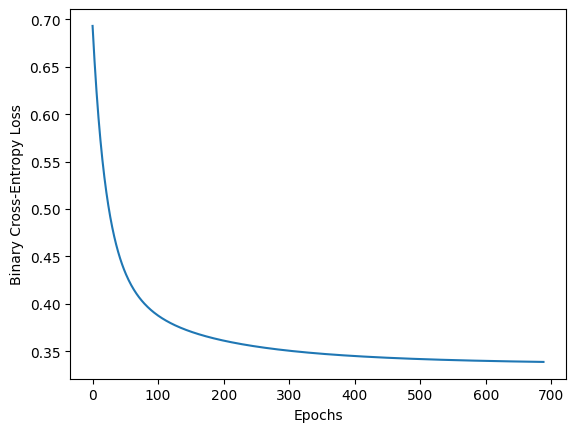

In [517]:
## run your algorithm and report your findings
wTrained, losses = logistic_regression_train(d1_xtrain_dummy, d1_ytrain, 0.1, 1e-5, 2000)

print("parameters:")
print(wTrained)
print("loss:")
print(losses[len(losses) - 1])
print("iterations:")
print(len(losses))

plt.plot(losses, label = 'Training loss')
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.show()

### Task 1.2 Testing performance

Implement a prediction method that takes as input the features together with the learnt parameter and outputs the predicted labels.

In [518]:
def predict_logistic_regression(w, X = d1_xtest_dummy):
    n, d = X.shape
    return sigmoid(X@w).round(0)

def test_performance(y_pred, y):
    # TODO: test performance
    n = y.shape[0]
    return (1-abs(y-y_pred)).sum() / n

Report the test performance on the unseen test dataset.

In [519]:
## run your algorithm and report your findings
print("Test performance")
print(test_performance(predict_logistic_regression(wTrained, d1_xtest_dummy), d1_ytest))

0.868


### Task 1.3 Regularisation

In this sub-task, you are going to apply $L_2$ regularisation to the logistic regression model. The regularised loss is

$$
L(\mathbf{w})=  \frac{1}{n}\sum_{i=1}^n -{y^{(i)}} \ln \sigma^{(i)}- (1- y^{(i)}) \ln (1-\sigma^{(i)}) + \frac{\lambda}{2} \mathbf{w}^\top\mathbf{w}
$$

* where $\lambda >0$ is the regularisation hyperparameter

* note that we do not usually apply penalty on the bias parameter $b$

Implement the following method that fits a regularised logistic regression model with a given $\lambda$.

In [520]:
def logistic_regression_reg_train(X, y, lr, lam = 1.0, tol=1e-5, maxIters = 2000):
    n,d = X.shape
    w0 = np.zeros(d)
    l0 = cross_entropy_loss(w0, X, y) + ((lam/2) * w0.T@w0)
    losses = [l0]
    # loop until converge
    for i in range(maxIters):
        ## Implement gradient descent here
        grad = gradient_ce_loss(w0, X, y) + (lam * w0)
        w0 -= lr * grad;
        losses.append(cross_entropy_loss(w0, X, y) + ((lam/2) * w0.T@w0))
        # Check convergence here 
        if (abs(losses[-1] - losses[-2]) <= tol):
            break
    return w0, losses

Complete and report the following two results
* report the training loss and learnt parameter by setting $\lambda=0.01$
* report the testing performance for the regularised logistic regression model with $\lambda=0.01$

parameters:
[-1.79163438  1.09166228 -0.61417084  0.2323597  -0.03713145]
Training loss:
0.37596733089328804
iterations:
438
Test performance
0.868


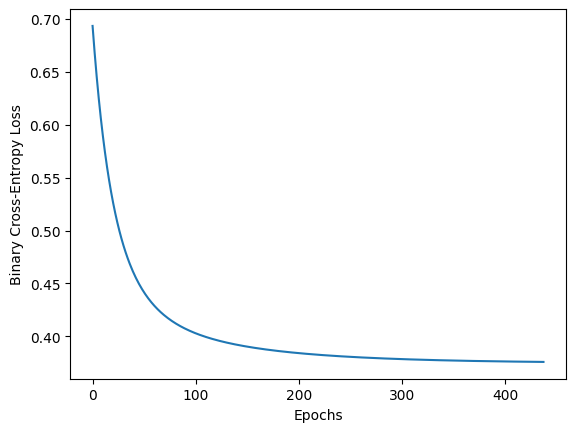

In [535]:
## run your algorithm and report your findings
wTrained, losses = logistic_regression_reg_train(d1_xtrain_dummy, d1_ytrain, 0.1, 0.01, 1e-5, 2000)

print("parameters:")
print(wTrained)
print("Training loss:")
print(losses[len(losses) - 1])
print("iterations:")
print(len(losses))

print("Test performance")
print(test_performance(predict_logistic_regression(wTrained, d1_xtest_dummy), d1_ytest))

plt.plot(losses, label = 'Training loss')
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.show()

### Task 1.4 Stochastic gradient descent 


Implement a stochastic gradient descent algorithm with a mini-batch size of 1. You should consider shuffling the training dataset to improve the convergence speed. 

It is a good idea to implement a decaying learning rate. One possible choice is 
$$\gamma_t = \frac{\gamma_0}{1 + \tau \gamma_0 t}$$
* where $\gamma_0 >0$ is the initial learning rate,
* and $\tau \geq 0$ is a tuning parameter, *e.g.* $\tau = 0.1$

After implementing the algorithm, use it to train the logistic regression model. Compare the performance with the batch learning algorithm.

In [522]:
def logistic_regression_reg_sgd_train(X, y, gamma0 = 1.0, tau=0.1, tol=1e-4, maxIters = 100):
    n, d = X.shape
    # initialise w0
    w0 = np.zeros(d)
    l0 = cross_entropy_loss(w0, X, y)
    losses = [l0]
    # loop until converge
    for i in range(maxIters):
        # Shuffle training set
        indexes = np.random.rand(X.shape[0]).argsort()
        np.take(X,indexes,axis=0,out=X)
        np.take(y,indexes,axis=0,out=y)        
        for j in range(n):
            ## Implement gradient descent here
            grad = gradient_ce_loss(w0, X[[j]], y[[j]])
            w0 -= (gamma0 / (1 + (tau * gamma0 * i))) * grad;
        losses.append(cross_entropy_loss(w0, X, y))
        # Check convergence here 
        if (abs(losses[-1] - losses[-2]) <= tol):
            break
    return w0, losses

parameters:
[-2.71043514  2.07270599 -0.94669441  0.26818914 -0.1058426 ]
loss:
0.34400114597952414
iterations:
38
Test performance
0.864


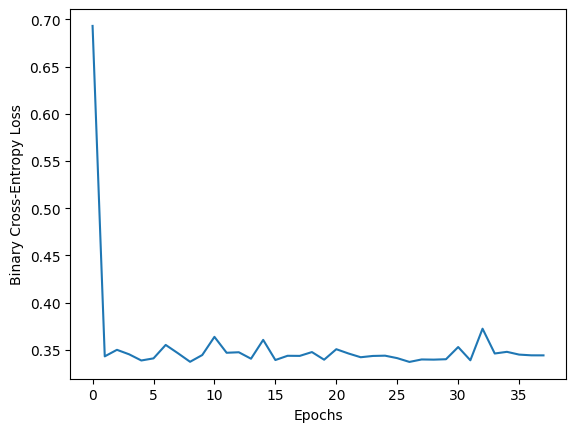

In [536]:
## run your algorithm and report your findings
wTrained, losses = logistic_regression_reg_sgd_train(d1_xtrain_dummy, d1_ytrain, 0.1, 0.1)

print("parameters:")
print(wTrained)
print("loss:")
print(losses[len(losses) - 1])
print("iterations:")
print(len(losses))
print("Test performance")
print(test_performance(predict_logistic_regression(wTrained, d1_xtest_dummy), d1_ytest))

plt.plot(losses, label = 'Training loss')
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.show()

## Question 2 (Fixed basis expansion)



In this question, we are going to implement a fixed basis expansion regression model. The dataset for this question has a univariate feature $\mathbf{x}^{(i)} \in \mathbb{R}$ and as expected the target $y^{(i)} \in \mathbb{R}$ is real valued. 


The dataset is imported below for you:
* ``dataset2``: 1000 observations and each input ${x}^{(i)}$ is a scalar 
* and the last column is the target ${y}^{(i)}$
* the dataset is then split into training and testing parts

In [524]:
# read in dataset2
dataset2_df = pd.read_csv('./datasets/dataset2.csv', header=0)
dataset2 = np.array(dataset2_df)
d2X, d2Y = dataset2[:, 0], dataset2[:, -1]
# split the data into training and testing 
# the training dataset has the first 800 observation; 
# in practice, you should randomly shuffle before the split
d2_xtrain, d2_ytrain = d2X[0:800], d2Y[0:800]
# # the testing dataset has the last 500
d2_xtest, d2_ytest = d2X[800:], d2Y[800:]

The data is plotted below.

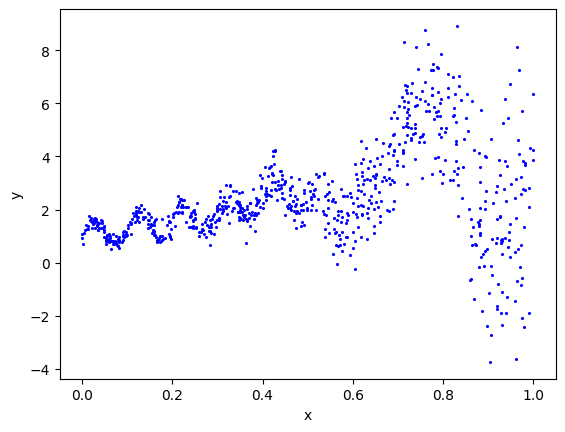

In [525]:
plt.scatter(d2_xtrain, d2_ytrain,  c ="blue", s=1.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Task 2.1 Basis function

Implement the radian-basis-function (rbf), 

$$\phi(x; \mu, s) = \exp\left \{- \frac{(x-\mu)^2}{2s} \right \}$$

In [526]:
def phi_rbf(x, mu, s):
    return np.exp((-np.square(x-mu)) / (2 * s))

### Task 2.2 Fixed basis expansion regression

Implement the fixed basis expansion regression model. Specifically, you should 
* first apply $K$ fixed basis expansion on the input $\{x^{(i)}\}$ to form the expanded design matrix $\mathbf{\Phi}$
* then fit a regression model by a non-iterative algorithm (*i.e.* the normal equation method)

In [527]:
def mu_even_spacing(X, mus):
    return np.linspace(X.min(), X.max(), mus)

def mu_random(X, mus):
    return np.sort(X[np.random.choice(X.shape[0], size=mus, replace=False)])

def expansion(X, mus, s, phi_f, mu_f):
    M = mu_f(X, mus)
    phi = np.column_stack((np.ones(X.shape), X))
    for mu in M:
        p = phi_f(X, mu, s)
        phi = np.column_stack((phi, p))
    return phi

def fixed_basis_rbf_reg(X, y, mus, s, phi_f = phi_rbf, mu_f = mu_even_spacing):
    # Pick evenly spaced mus 
    phi = expansion(X, mus, s, phi_f, mu_f)
    return np.linalg.inv(phi.T@phi)@phi.T@y

Implement a prediction method `predict_rbf_reg`, that outputs the prediction $\hat{y}$ given input $x_{test}$. Note that the method should be able to predict outputs for multiple test inputs.

In [528]:
def predict_rbf_reg(X, w, mus, s, phi_f = phi_rbf, mu_f = mu_even_spacing):
    phi = expansion(X, mus, s, phi_f, mu_f)
    return phi@w

Fit a fixed basis expansion regression model with $K=50$ fixed basis functions. The expansion locations $\mu$s should be within $x$'s range. And it is up to you how to choose them (*e.g.* they can be evenly placed within the range).

* try different settings (*e.g.* with different expansion location and scale $s$ choices)
* plot the fitted function (together with the training data) of your choice 
* and report the test error on your chosen model

In [529]:
# Calculate error
def linear_error(y, y_pred):
    n = y.shape[0]
    return np.square((y-y_pred).sum()) / n

def runTest(xTrain, yTrain, xTest, yTest, K, s, phi_f, mu_f):
    w = fixed_basis_rbf_reg(xTrain, d2_ytrain, K, s, phi_f=phi_f, mu_f=mu_f)
    pred_test = predict_rbf_reg(xTest, w, K, s)
    pred_train = predict_rbf_reg(xTrain, w, K, s)

    plt.title("Fixed Basis Expansion Training Results using " + mu_f.__name__ + ", and " + phi_f.__name__ + " with s=" + str(s))
    plt.scatter(xTrain, yTrain,   c ="blue",  s=1, label="Data Values")
    plt.scatter(xTrain, pred_train,  c ="red",   s=1, label="Prediction")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc=0)
    plt.show()

    plt.title("Fixed Basis Expansion Test Results using " + mu_f.__name__ + ", and " + phi_f.__name__ + " with s=" + str(s))
    plt.scatter(xTest, yTest,   c ="blue",  s=1, label="Data Values")
    plt.scatter(xTest, pred_test,  c ="red",   s=1, label="Prediction")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc=0)
    plt.show()

    print("Training Error")
    print(linear_error(yTrain, pred_train))
    print("Testing Error")
    print(linear_error(yTest, pred_test))

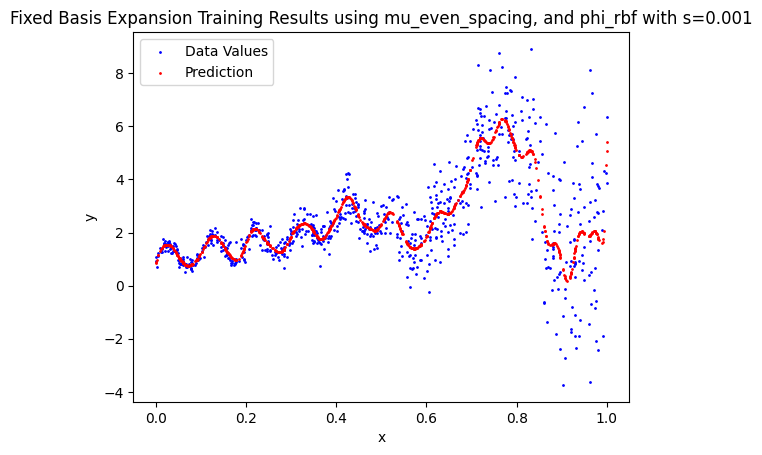

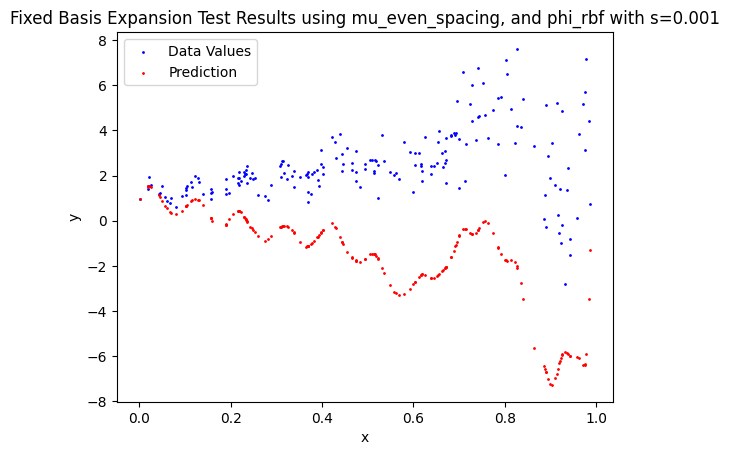

Training Error
1.2014964428162416e-13
Testing Error
3312.1511525120063


In [530]:
## run your algorithm and report your findings
K = 50
s = 0.001

runTest(d2_xtrain, d2_ytrain, d2_xtest, d2_ytest, K, s, phi_f=phi_rbf, mu_f=mu_even_spacing)


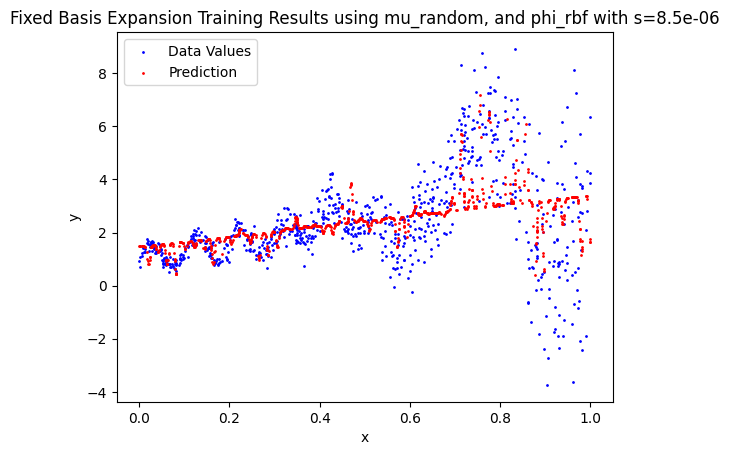

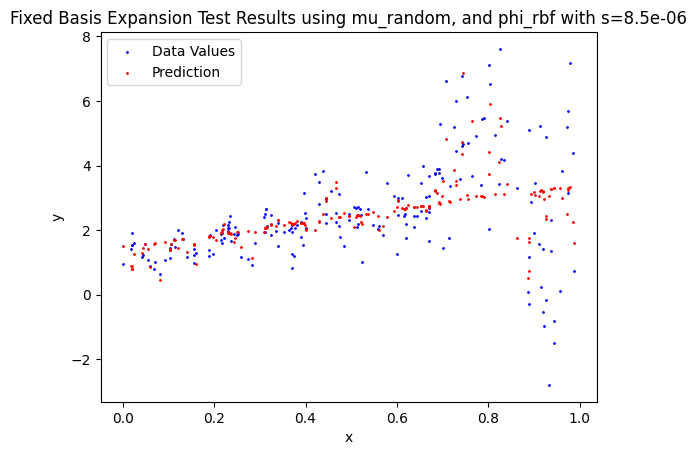

Training Error
0.01867801500645389
Testing Error
0.0844445884757828


In [534]:
## run your algorithm and report your findings
K = 50
s = 0.0000085

runTest(d2_xtrain, d2_ytrain, d2_xtest, d2_ytest, K, s, phi_f=phi_rbf, mu_f=mu_random)

### Task 2.3 Other basis function


Implement another basis function of your choice and fit the regression model. Plot the fitted result below.

In [532]:
def phi_logistic(x, mu, s):
    return 1 / (1 + np.exp(-(x-mu)/s))

/home/george/src/CS5014/P1/.venv/lib/python3.11/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


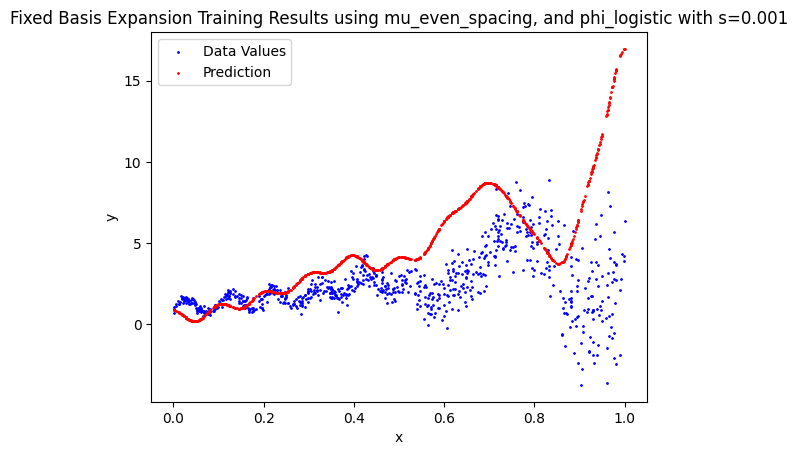

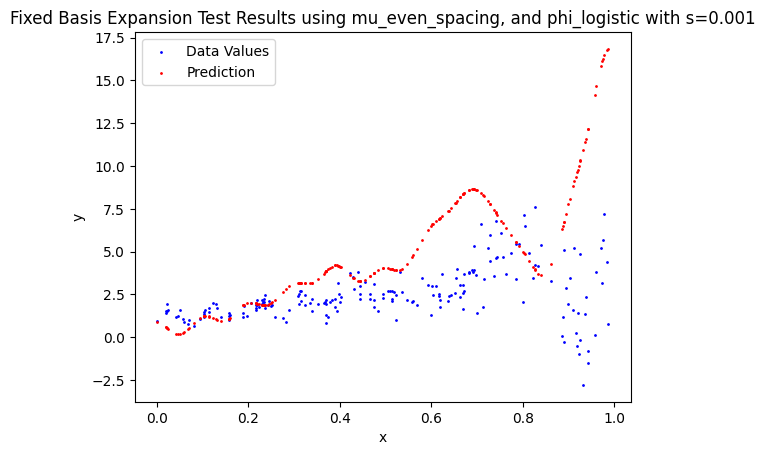

Training Error
4266.1594583051265
Testing Error
1348.3405308407566


In [533]:
## LOGISTIC 

# Parameter Settings
K = 50
s = 0.001

runTest(d2_xtrain, d2_ytrain, d2_xtest, d2_ytest, K, s, phi_f=phi_logistic, mu_f=mu_even_spacing)


### Task 2.4 Advanced task (extension*)

We assume the noise scale is a constant for an ordinary linear regression model. However, the noise scale for this dataset is not homogenous: it increases as $x$ gets larger. This is known as heteroscedasticity. Fit a fixed basis regression model that can also learn the adapting noise scale. You are allowed to use auto-differentiation for this question. Explain your model and report your findings in appropriate formats such as plots.

## Submission
Hand in via MMS: the completed jupyter notebook. Your notebook should be reproducible.



## Marking
Your submission will be marked as a whole. 

* to get a grade above 7, you are expected to finish at least Task 1.1-1.2 to a good standard
* to get a grade above 10 and up to 13, you are expected to complete Task 1.1-1.4 to a good standard
* to get a grade above 13 and up to 17, you are expected to complete all tasks except 2.3 and 2.4 to a good standard
* to achieve a grade of 17-18, you are expected to finish all tasks except Task 2.4 flawlessly 
* to get 18+, you are expected to attempt all questions flawlessly


Marking is according to the standard mark descriptors published in the Student Handbook at:

https://info.cs.st-andrews.ac.uk/student-handbook/learning-teaching/feedback.html#GeneralMarkDescriptors


You must reference any external sources used. Guidelines for good academic practice are outlined in the student handbook at https://info.cs.st-andrews.ac.uk/student-handbook/academic/gap.html
